In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold


In [3]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
train_df = pd.read_csv('Train.csv')
test_df  = pd.read_csv('Test.csv')

In [5]:
train = train_df.copy()
test = test_df.copy()

In [6]:
train.shape

(50000, 5)

In [7]:
train.columns

Index(['id', 'tweet_text', 'tweet_date', 'sentiment', 'query_used'], dtype='object')

In [8]:
test.columns

Index(['id', 'tweet_text', 'tweet_date'], dtype='object')

In [9]:
train.iloc[1]

,1
id,1049104603332169728
tweet_text,me diz aí o que vai ser do serviço social com ...
tweet_date,Mon Oct 08 01:10:03 +0000 2018
sentiment,1
query_used,:)


In [10]:
train.drop(columns=['id', 'tweet_date', 'query_used'], inplace= True),test.drop(columns=['id', 'tweet_date'], inplace= True)

(None, None)

In [11]:
train.columns
test.columns

Index(['tweet_text', 'sentiment'], dtype='object')

Index(['tweet_text'], dtype='object')

In [12]:
train['sentiment'].value_counts()

,count
sentiment,
0,25000
1,25000


Convert text to lowercase for consistency.


In [13]:
# Convert the 'Text' column to lowercase in both train and test datasets
train['tweet_text'] = train['tweet_text'].str.lower()
test['tweet_text'] = test['tweet_text'].str.lower()


In [14]:
#print(train['Text'].head())  # Check the first few rows of the 'Text' column in train
#print(test['Text'].head())   # Check the first few rows of the 'Text' column in test


In [15]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
#    return tt
    return(np.transpose(tt))

In [16]:
train['tweet_text'].count()
train['tweet_text'].count()

50000

50000

Remove HTML tags and non-ASCII characters using regular expressions.


In [17]:
import re

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure the input is a string
        text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
        text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
        text = re.sub(r'[^\w\s]', ' ', text)  # Replace punctuation with spaces
    return text

# Apply the cleaning function to the 'Text' column in train and test datasets
train['tweet_text'] = train['tweet_text'].apply(clean_text)
test['tweet_text'] = test['tweet_text'].apply(clean_text)


In [18]:
Xtr_str, Xts_str, ytr, yts = train_test_split(train[['tweet_text']], train['sentiment'], shuffle=True, random_state=42, test_size=0.3)

Xtr_str.head()


,tweet_text
38094,morangopicado oi ju ainda no temos previso ...
40624,balfess a gente precisa se ver e descontrair ...
49425,es que es difcil https t co jcbejnv2mg
35734,gcfucking eu to com sono
41708,a ns to fixe que nem tv tenho https t co z...


In [19]:
Xtr_str.shape
ytr.shape
Xtr_str['tweet_text']

(35000, 1)

(35000,)

,tweet_text
38094,morangopicado oi ju ainda no temos previso ...
40624,balfess a gente precisa se ver e descontrair ...
49425,es que es difcil https t co jcbejnv2mg
35734,gcfucking eu to com sono
41708,a ns to fixe que nem tv tenho https t co z...
...,...
11284,samiabomfim meu voto foi seu e sei que foi a ...
44732,yourbuzzcut ei meu anjo ce quer conversar e...
38158,hoje eu e o renan completamos 9 meses e a nica...
860,ggukpallet vc no isso meu bem


In [20]:
pip install nltk


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Download Portuguese stop words
nltk.download('stopwords')

# Get Portuguese stop words
portuguese_stop_words = stopwords.words('portuguese')

# Use the Portuguese stop words in TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=portuguese_stop_words)

# Transform the training and test datasets
tfidf_matrix = tfidf.fit_transform(Xtr_str['tweet_text'])
test_tfidf_matrix = tfidf.transform(Xts_str['tweet_text'])
test_matrix = tfidf.transform(test['tweet_text'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
tfidf_matrix

<35000x57354 sparse matrix of type '<class 'numpy.float64'>'
	with 290206 stored elements in Compressed Sparse Row format>

In [23]:
C_test = np.logspace(-1,3,20)

In [24]:
C_test

array([1.00000000e-01, 1.62377674e-01, 2.63665090e-01, 4.28133240e-01,
       6.95192796e-01, 1.12883789e+00, 1.83298071e+00, 2.97635144e+00,
       4.83293024e+00, 7.84759970e+00, 1.27427499e+01, 2.06913808e+01,
       3.35981829e+01, 5.45559478e+01, 8.85866790e+01, 1.43844989e+02,
       2.33572147e+02, 3.79269019e+02, 6.15848211e+02, 1.00000000e+03])

In [25]:
nfold = 5
score_val = np.zeros((len(C_test), nfold))

In [26]:
print(tfidf_matrix.shape[0])  # Number of samples in the feature matrix
print(len(ytr))               # Number of labels
print(test_tfidf_matrix.shape[0])
print(len(yts))               # Number of labels


35000
35000
15000
15000


In [27]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import warnings
warnings.filterwarnings('ignore')
nfolds = 5
kf = KFold(n_splits=nfolds, shuffle=False)

# For each fold
for fold_index, (train_index, val_index) in enumerate(kf.split(tfidf_matrix)):
    # For each C in the list, fit a LogisticRegression model
    x_train_data, x_val_data = tfidf_matrix[train_index], tfidf_matrix[val_index]
    y_train_data, y_val_data = ytr.iloc[train_index], ytr.iloc[val_index]
    for c_index, c_values in enumerate(C_test):

        clf  = LogisticRegression(random_state = 42, solver = 'liblinear', penalty='l1', C = c_values)
        clf.fit(x_train_data,y_train_data)
        y_hat = clf.predict(x_val_data)




        # Use f1_score with an appropriate average for multiclass classification
        score_val[c_index, fold_index] = f1_score(y_val_data, y_hat, average='macro')

LogisticRegression(C=0.09999999999999999, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.16237767391887217, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.2636650898730358, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.42813323987193935, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.6951927961775605, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.1288378916846888, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.8329807108324356, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=4.832930238571752, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=7.847599703514611, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=12.742749857031333, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=33.59818286283781, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=54.555947811685144, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=88.58667904100822, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=143.8449888287663, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=233.57214690901213, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=379.2690190732246, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=615.848211066026, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1000.0, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.09999999999999999, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.16237767391887217, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.2636650898730358, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.42813323987193935, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.6951927961775605, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.1288378916846888, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.8329807108324356, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=4.832930238571752, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=7.847599703514611, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=12.742749857031333, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=33.59818286283781, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=54.555947811685144, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=88.58667904100822, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=143.8449888287663, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=233.57214690901213, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=379.2690190732246, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=615.848211066026, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1000.0, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.09999999999999999, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.16237767391887217, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.2636650898730358, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.42813323987193935, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.6951927961775605, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.1288378916846888, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.8329807108324356, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=4.832930238571752, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=7.847599703514611, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=12.742749857031333, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=33.59818286283781, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=54.555947811685144, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=88.58667904100822, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=143.8449888287663, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=233.57214690901213, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=379.2690190732246, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=615.848211066026, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1000.0, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.09999999999999999, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.16237767391887217, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.2636650898730358, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.42813323987193935, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.6951927961775605, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.1288378916846888, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.8329807108324356, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=4.832930238571752, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=7.847599703514611, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=12.742749857031333, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=33.59818286283781, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=54.555947811685144, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=88.58667904100822, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=143.8449888287663, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=233.57214690901213, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=379.2690190732246, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=615.848211066026, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1000.0, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.09999999999999999, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.16237767391887217, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.2636650898730358, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.42813323987193935, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=0.6951927961775605, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.1288378916846888, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1.8329807108324356, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=4.832930238571752, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=7.847599703514611, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=12.742749857031333, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=20.6913808111479, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=33.59818286283781, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=54.555947811685144, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=88.58667904100822, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=143.8449888287663, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=233.57214690901213, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=379.2690190732246, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=615.848211066026, penalty='l1', random_state=42,
                   solver='liblinear')

LogisticRegression(C=1000.0, penalty='l1', random_state=42, solver='liblinear')

In [28]:

score_mean = np.mean(score_val,axis = 1)
se = np.std(score_val,axis = 1)/np.sqrt(nfolds-1)
C_best_index = np.argmax(score_mean)
print(C_best_index)
C_best = C_test[C_best_index]
C_best

7


2.976351441631318

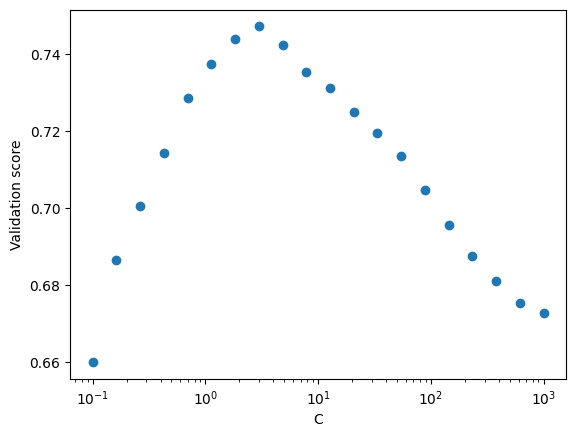

In [29]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import matplotlib.pyplot as plt
plt.scatter(C_test, score_mean);
plt.xscale('log');
plt.xlabel('C');
plt.ylabel("Validation score");

In [30]:
clf_logistic  = LogisticRegression(random_state = 42, solver = 'liblinear', penalty='l1', C = C_test[C_best_index])
clf_logistic.fit(tfidf_matrix,ytr)
yhat_ts = clf_logistic.predict(test_tfidf_matrix)
score_ts = f1_score(y_val_data, y_hat, average='macro')
score_ts

LogisticRegression(C=2.976351441631318, penalty='l1', random_state=42,
                   solver='liblinear')

0.6802637634142883

In [31]:
yhat_logistic_predict = clf_logistic.predict(test_matrix)

In [32]:
yhat_logistic_predict

array([1, 0, 0, ..., 0, 0, 0])

In [33]:

test_results = test_df.copy()
#test_results['Category'] = yhat_kaggle_predict

#test_resluts = test_results[['Text', 'Category']].to_csv('test_features.csv', index=False)

In [34]:
# Prepare submission
submission = pd.DataFrame({
    'id': test_results['id'],
    'sentiment': yhat_logistic_predict
})
submission.to_csv('brazil_logistic_sentiment_submission.csv', index=False)
print("Submission file created.")


Submission file created.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Rescaling, Conv2D, MaxPooling2D, Input
from keras import backend as K
#from keras.datasets import mnist
from keras.utils import plot_model

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Download Portuguese stop words
nltk.download('stopwords')

# Get Portuguese stop words
portuguese_stop_words = stopwords.words('portuguese')

# Use the Portuguese stop words in TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=portuguese_stop_words, max_features=5000)

# Transform the training and test datasets
tfidf_matrix = tfidf.fit_transform(Xtr_str['tweet_text'])
test_tfidf_matrix = tfidf.transform(Xts_str['tweet_text'])
test_matrix = tfidf.transform(test['tweet_text'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nin = tfidf_matrix.shape[1]  # dimension of one sample of input data
nh = 512     # number of hidden units
nout = 1   # number of outputs
model_fc = Sequential()
model_fc.add(Input(shape=(nin,)))  # Shape should be (nin,)
model_fc.add(Dense(units=nh, activation='relu', name='hidden'))
model_fc.add(Dense(units=nout, activation='sigmoid', name='output'))
model_fc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561,025 (9.77 MB)

 Trainable params: 2,561,025 (9.77 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.01)
model_fc.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change to qualify as an improvement (0.1%)
    patience=3,              # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Fit the model with the EarlyStopping callback
hist = model_fc.fit(
    tfidf_matrix,  # Training data
    ytr,           # Training labels
    epochs=30,     # Maximum number of epochs
    batch_size=24, # Batch size
    validation_data=(test_tfidf_matrix, yts),  # Validation data
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)


Epoch 1/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 102s 69ms/step - accuracy: 0.6993 - loss: 0.5622 - val_accuracy: 0.7401 - val_loss: 0.5067
Epoch 2/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8034 - loss: 0.4126 - val_accuracy: 0.7425 - val_loss: 0.5263
Epoch 3/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8810 - loss: 0.2700 - val_accuracy: 0.7373 - val_loss: 0.6356
Epoch 4/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9403 - loss: 0.1442 - val_accuracy: 0.7336 - val_loss: 0.7755
Epoch 5/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9567 - loss: 0.1022 - val_accuracy: 0.7271 - val_loss: 0.8283


In [40]:
final_predictions_nn = model_fc.predict(test_matrix)


157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step


In [41]:
# Convert probabilities to binary class predictions
final_predictions_labels = (final_predictions_nn >= 0.5).astype(int)

# Check the output
print(final_predictions_labels)


[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [42]:

test_results = test_df.copy()
#test_results['Category'] = yhat_kaggle_predict

#test_resluts = test_results[['Text', 'Category']].to_csv('test_features.csv', index=False)

In [43]:
submission = pd.DataFrame({
    'id': test_results['id'],
    'sentiment': final_predictions_labels.flatten()  # Convert to 1D array
})
submission.to_csv('brazil_nn_sentiment_submission.csv', index=False)
print("Submission file created.")


Submission file created.


In [44]:
submission.head()

,id,sentiment
0,1029570266916159488,1
1,1030496040649142272,1
2,1030496928755314688,0
3,1029559076815097856,1
4,1029551213866573830,1


# **Adding dropout layer**

In [45]:
nin = tfidf_matrix.shape[1]  # dimension of one sample of input data
nh = 512     # number of hidden units
nout = 1     # number of outputs

model_dfc = Sequential()
model_dfc.add(Input(shape=(nin,)))  # Input layer
model_dfc.add(Dense(units=nh, activation='relu', name='hidden'))  # Hidden layer
model_dfc.add(Dropout(0.5))  # Dropout with 50% dropout rate
model_dfc.add(Dense(units=nout, activation='sigmoid', name='output'))  # Output layer
model_dfc.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 512)                 │       2,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561,025 (9.77 MB)

 Trainable params: 2,561,025 (9.77 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.01)
model_dfc.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change to qualify as an improvement (0.1%)
    patience=3,              # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Fit the model with the EarlyStopping callback
hist = model_dfc.fit(
    tfidf_matrix,  # Training data
    ytr,           # Training labels
    epochs=30,     # Maximum number of epochs
    batch_size=24, # Batch size
    validation_data=(test_tfidf_matrix, yts),  # Validation data
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)


Epoch 1/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 142s 96ms/step - accuracy: 0.6997 - loss: 0.5674 - val_accuracy: 0.7465 - val_loss: 0.5034
Epoch 2/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7913 - loss: 0.4359 - val_accuracy: 0.7454 - val_loss: 0.5081
Epoch 3/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8334 - loss: 0.3705 - val_accuracy: 0.7473 - val_loss: 0.5357
Epoch 4/30
1459/1459 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8709 - loss: 0.2905 - val_accuracy: 0.7417 - val_loss: 0.5733


In [48]:
final_predictions_drop_nn = model_fc.predict(test_matrix)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
# Convert probabilities to binary class predictions
final_drop_predictions_labels = (final_predictions_drop_nn >= 0.5).astype(int)

# Check the output
print(final_drop_predictions_labels)


[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [50]:
submission = pd.DataFrame({
    'id': test_results['id'],
    'sentiment': final_drop_predictions_labels.flatten()  # Convert to 1D array
})
submission.to_csv('brazil_drop_nn_sentiment_submission.csv', index=False)
print("Submission file created.")


Submission file created.


# **RNN MODEL**